Iteration 1 - Model Weight: 1.0000
Iteration 2 - Model Weight: 1.0000
Iteration 3 - Model Weight: 1.0000
Iteration 4 - Model Weight: 1.0000
Model Accuracy: 1.0000


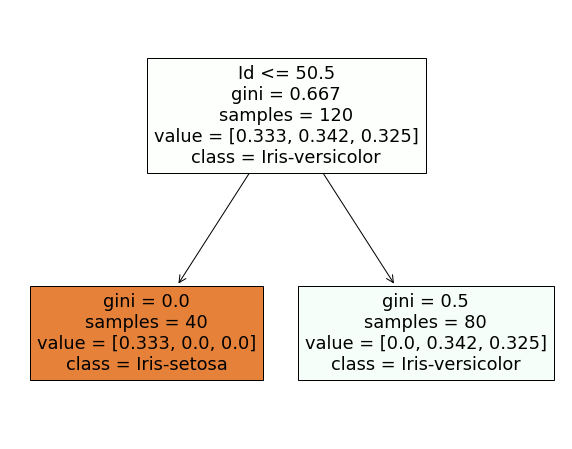

In [4]:
#Boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris_data = pd.read_csv('iris.csv')

# Separate features and target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Decision Tree as the base weak model
base_model = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost model with 4 iterations
boosting_model = AdaBoostClassifier(base_model, n_estimators=4, random_state=42)

# Train the model on the training data
boosting_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = boosting_model.predict(X_test)

# Display the model weights for each iteration
for i, model in enumerate(boosting_model.estimators_, start=1):
    print(f"Iteration {i} - Model Weight: {boosting_model.estimator_weights_[i-1]:.4f}")

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Visualize the Decision Tree for the first iteration
plt.figure(figsize=(10, 8))
plot_tree(boosting_model.estimators_[0], feature_names=X.columns, class_names=iris_data['Species'].unique(), filled=True)
plt.show()

Model Accuracy: 0.9667


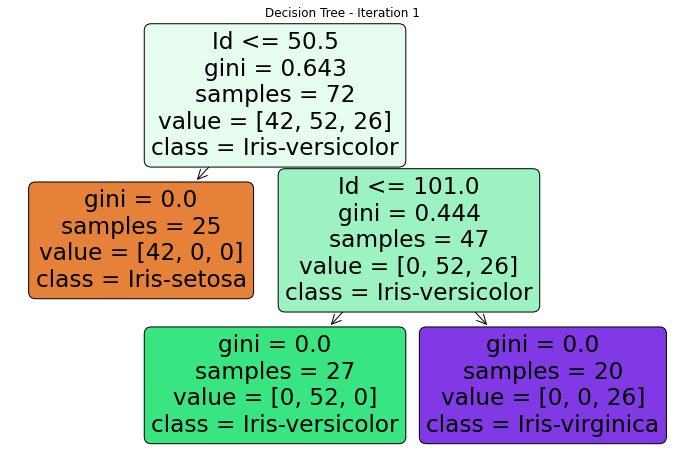

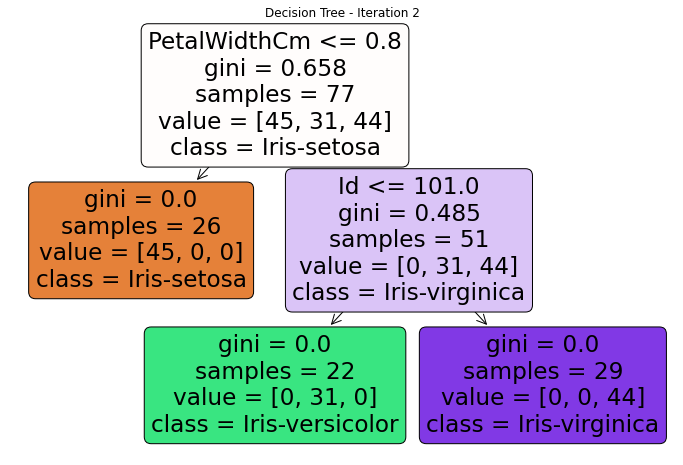

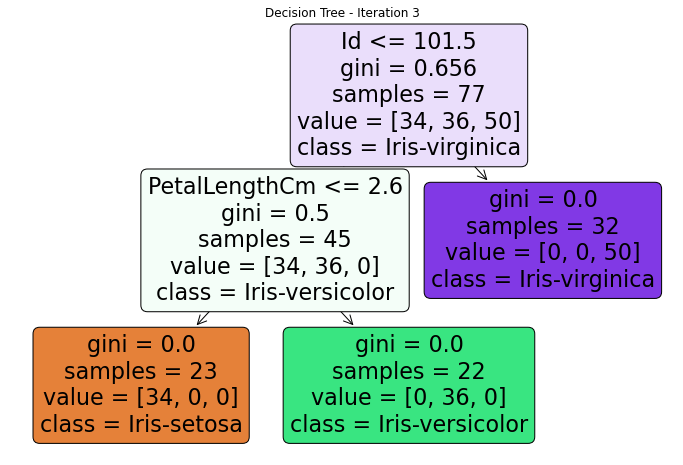

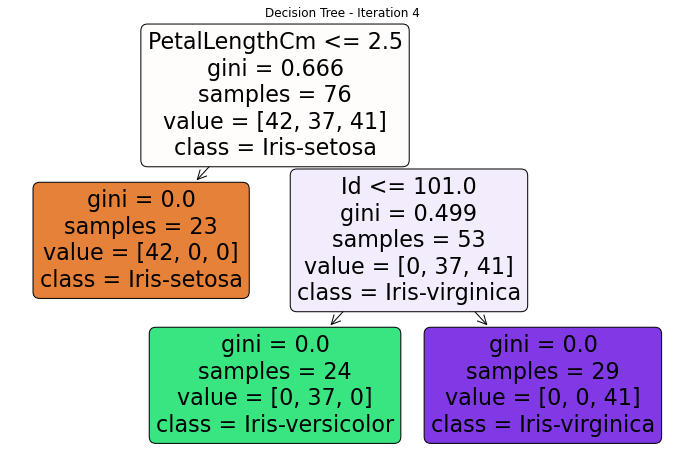

In [5]:
#Bagging
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris_data = pd.read_csv('iris.csv')

# Separate features and target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Use Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize Bagging model with 5 base estimators
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=4, random_state=0)

# Train the model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

# Visualize decision trees in the ensemble (five iterations)
for i, estimator in enumerate(bagging_model.estimators_):
    plt.figure(figsize=(12, 8))
    plot_tree(estimator, feature_names=X.columns, class_names=iris_data['Species'].unique(), filled=True, rounded=True)
    plt.title(f'Decision Tree - Iteration {i + 1}')
    plt.show()


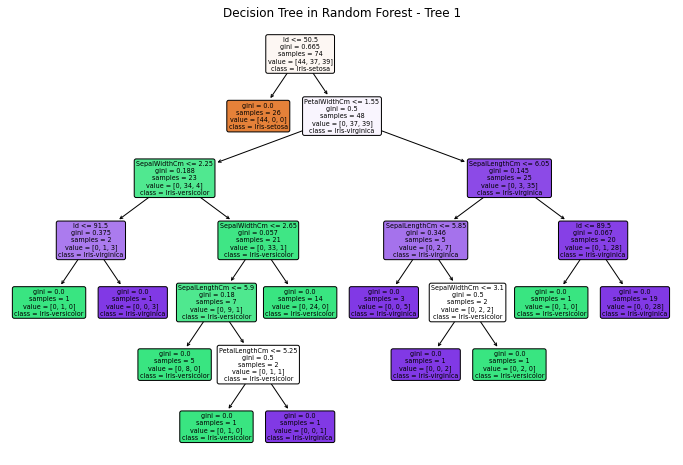

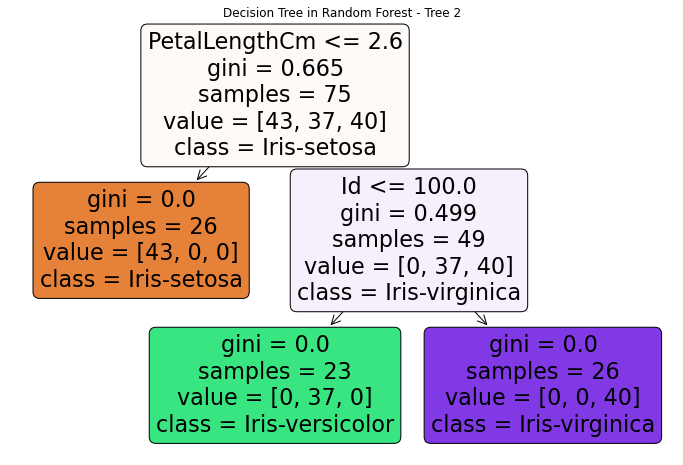

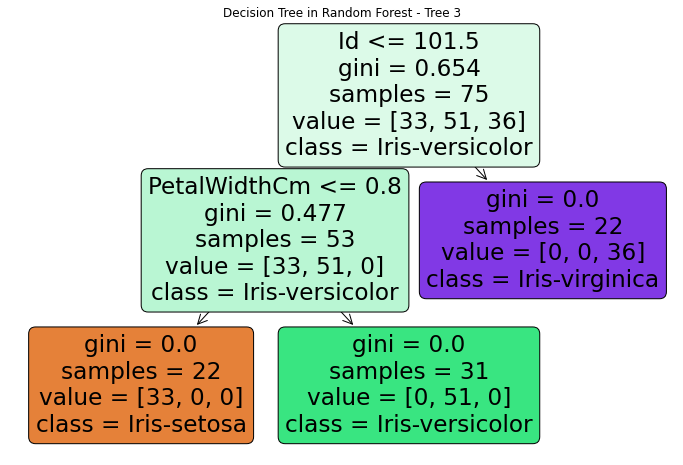

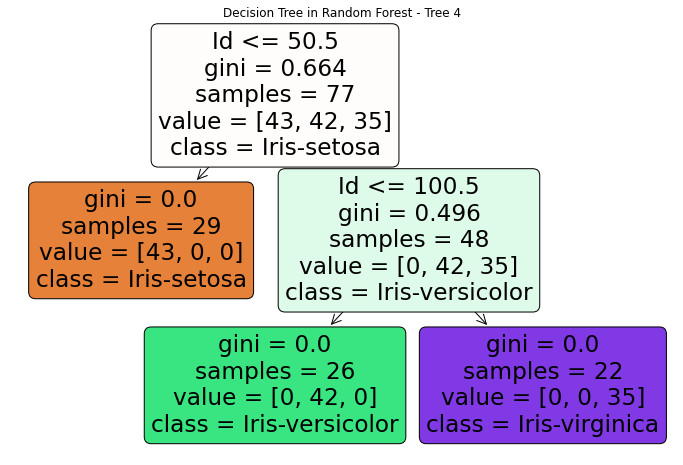

In [6]:
#Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

iris_data = pd.read_csv('iris.csv')

# Memisahkan fitur dan target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan Random Forest dengan 4 pohon (estimators)
random_forest_model = RandomForestClassifier(n_estimators=4, random_state=42)

# Melatih model pada data latih
random_forest_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = random_forest_model.predict(X_test)

# Visualisasi decision trees dalam ensemble (lima iterasi)
for i, tree_in_forest in enumerate(random_forest_model.estimators_):
    plt.figure(figsize=(12, 8))
    plot_tree(tree_in_forest, feature_names=X.columns, class_names=iris_data['Species'].unique(), filled=True, rounded=True)
    plt.title(f'Decision Tree in Random Forest - Tree {i + 1}')
    plt.show()

Iterasi 1 - MSE pada Data Uji setelah Pruning: 0.2279


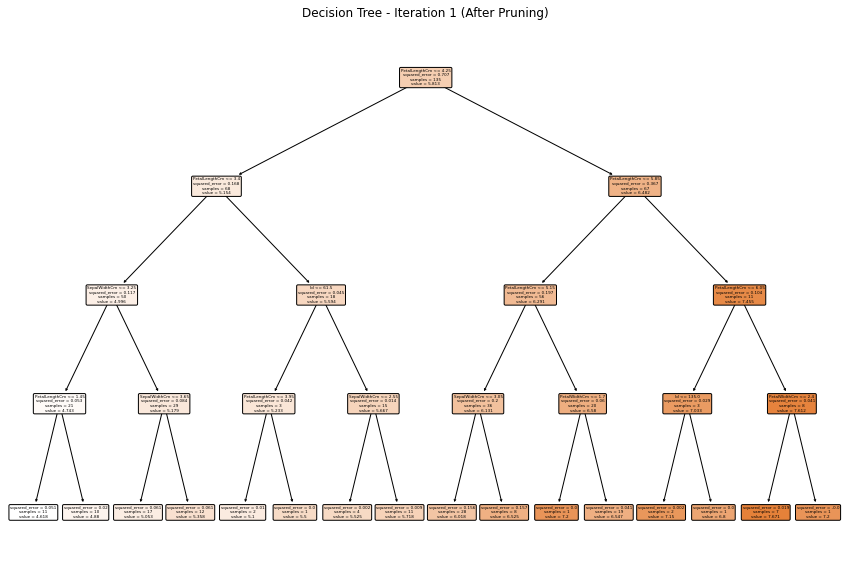

Iterasi 2 - MSE pada Data Uji setelah Pruning: 0.2279


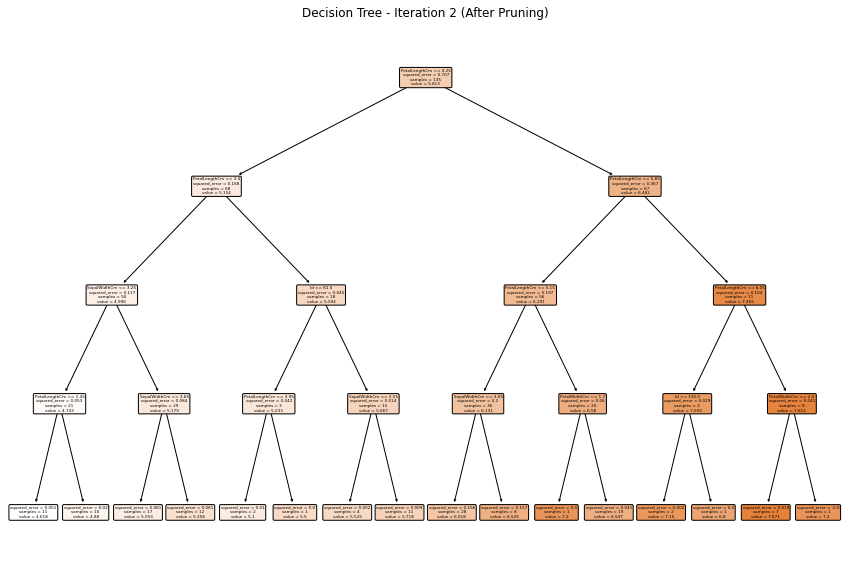

Iterasi 3 - MSE pada Data Uji setelah Pruning: 0.2279


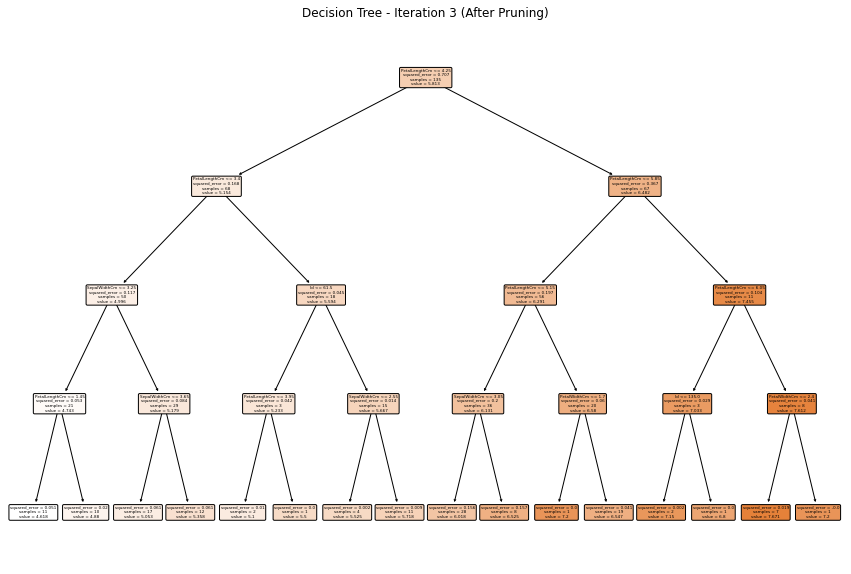

Iterasi 4 - MSE pada Data Uji setelah Pruning: 0.2279


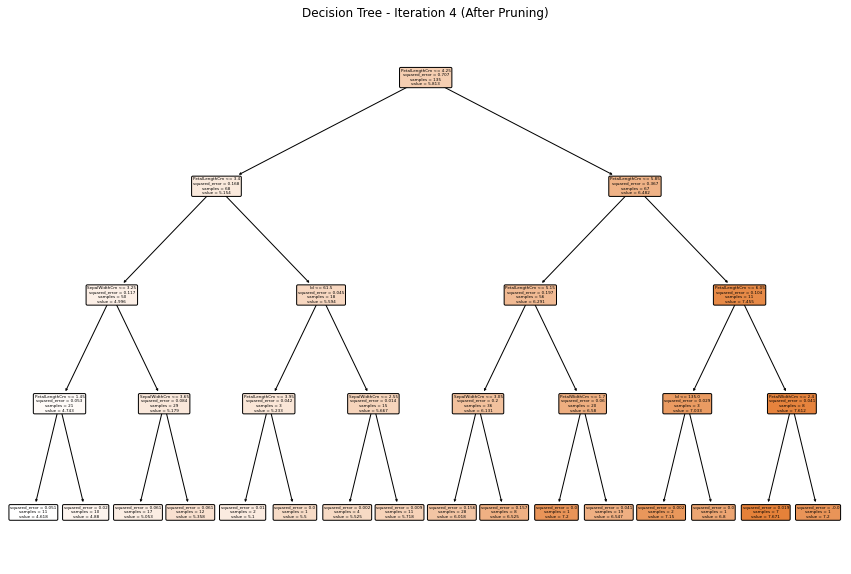

In [7]:
#Regression Tree
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Iris dataset
iris_data = pd.read_csv('iris.csv')

# Pilih satu fitur sebagai variabel target (contoh: SepalLengthCm)
X = iris_data.drop(['Species', 'SepalLengthCm'], axis=1)
y = iris_data['SepalLengthCm']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Inisialisasi Decision Tree Regressor tanpa pruning
regression_tree_unpruned = DecisionTreeRegressor(random_state=0)

# Melatih model pada data latih tanpa pruning
regression_tree_unpruned.fit(X_train, y_train)

# Melakukan 4 iterasi
for i in range(4):
    # Pruning dengan menyetel parameter max_depth
    regression_tree_pruned = DecisionTreeRegressor(max_depth=4, random_state=0)
    
    # Melatih model pada data latih
    regression_tree_pruned.fit(X_train, y_train)
    
    # Mencetak MSE pada data uji setelah pruning
    y_pred_test_pruned = regression_tree_pruned.predict(X_test)
    mse_test_pruned = mean_squared_error(y_test, y_pred_test_pruned)
    print(f'Iterasi {i+1} - MSE pada Data Uji setelah Pruning: {mse_test_pruned:.4f}')
    
    # Visualisasi Decision Tree setelah pruning
    plt.figure(figsize=(15, 10))
    plot_tree(regression_tree_pruned, feature_names=X.columns, filled=True, rounded=True)
    plt.title(f'Decision Tree - Iteration {i + 1} (After Pruning)')
    plt.show()


First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Missing values before handling:
Age     86
Fare     1


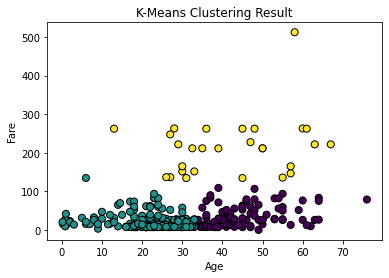

In [3]:
#K-Means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca dataset Titanic.csv
df = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\Titanic.csv', sep=',')

# Menampilkan beberapa baris pertama dari dataset
print("First few rows of the dataset:")
print(df.head())

# Menyaring kolom-kolom yang akan digunakan untuk clustering
df_cluster = df[['Age', 'Fare']].copy()

# Menampilkan informasi tentang missing values sebelum handling
print("\nMissing values before handling:")
print(df_cluster.isnull().sum())

# Handling missing values: Drop rows with missing values
df_cluster.dropna(inplace=True)

# Handling infinite values: Replace infinite values with NaN and drop rows
df_cluster.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cluster.dropna(inplace=True)

# Menampilkan informasi tentang missing values setelah handling
print("\nMissing values after handling:")
print(df_cluster.isnull().sum())

# Melakukan standard scaling pada data yang akan digunakan untuk clustering
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

# Membuat objek KMeans dengan 3 klaster dan random state 0
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan clustering dengan KMeans pada data yang telah di-scaled
cluster_labels = kmeans.fit_predict(df_scaled)

# Menambahkan kolom 'Cluster' ke dalam DataFrame utama
df = df.loc[df_cluster.index]  # Match the indices after handling missing values
df['Cluster'] = cluster_labels

# Menampilkan beberapa baris pertama dari DataFrame dengan kolom 'Cluster' baru
print("\nFirst few rows of the DataFrame with 'Cluster' column:")
print(df.head())

# Membuat scatter plot dari data hasil clustering
plt.scatter(df['Age'], df['Fare'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering Result')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [72]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
file_path = 'groceries.csv'
df = pd.read_csv(file_path)
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(1, 6) if pd.notnull(df.values[i, j])])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
min_support = 0.1  
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
frequent_itemsets['confidence'] = 0.0  
for idx, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']
    antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == itemset]['support'].values[0]
    confidence = row['support'] / antecedent_support
    frequent_itemsets.at[idx, 'confidence'] = confidence
print("Itemset yang sering muncul bersama:")
print(frequent_itemsets[['support', 'itemsets', 'confidence']])
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("\nAturan Asosiasi:")
print(rules[['antecedents', 'consequents', 'confidence']])

Itemset yang sering muncul bersama:
    support            itemsets  confidence
0  0.182918  (other vegetables)         1.0
1  0.144484        (rolls/buns)         1.0
2  0.105643   (root vegetables)         1.0
3  0.120488              (soda)         1.0
4  0.104423    (tropical fruit)         1.0
5  0.238027        (whole milk)         1.0
6  0.116218            (yogurt)         1.0

Aturan Asosiasi:
Empty DataFrame
Columns: [antecedents, consequents, confidence]
Index: []
